In [63]:
import langchain as lc
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate,)

from langchain_core.messages import SystemMessage, HumanMessage


In [64]:
system_prompt = """
You have a dataset containing stock information for various companies. Each row in the dataset represents the stock details for a specific company.

The dataset contains the following columns:

- `StockID` (integer): The unique identifier for the stock.
- `CompanyName` (character): The name of the company associated with the stock.
- `Sector` (character): The sector or industry in which the company operates.
- `LastClose(EUR)` (float): The last closing price of the stock in Euros.
- `52WeekHigh(EUR)` (float): The highest price the stock has reached in the past 52 weeks, in Euros.
- `52WeekLow(EUR)` (float): The lowest price the stock has reached in the past 52 weeks, in Euros.
- `MarketCap(Billion EUR)` (float): The market capitalization of the company in billion Euros.

In this dataset, you can expect to find information about the stock performance, company details, and financial metrics for each company."""

In [65]:
user_prompt = "Suggest a single data analysis question that could be answered with this dataset"

In [66]:
messages_langchain = [
    SystemMessage(content=f"You are an expert in data science.\n {system_prompt}"),
    HumanMessage(content=f"{user_prompt}")
]

In [67]:
chat = ChatOpenAI(temperature=0)
response = chat(messages_langchain)

In [68]:
response

AIMessage(content='What is the average market capitalization of companies in each sector?')

In [69]:
print(type(response))

<class 'langchain_core.messages.ai.AIMessage'>


In [70]:
response_string = response.content

In [71]:
next_message = "So what is the min and max market capitalization in each sector?"
next_human_message = HumanMessage(content=next_message)

In [72]:
message02 = messages_langchain + [ #the variable with the list of previous SystemMessage and HumanMessage
    response, #the output we got from the previous turn in the conversation
    next_human_message #the next HumanMessage
]

In [73]:
response02 = chat(message02)

In [75]:
from IPython.display import display, Markdown
display(Markdown(response02.content))

To find the minimum and maximum market capitalization in each sector, you can perform the following analysis:

1. Group the dataset by the "Sector" column.
2. Calculate the minimum and maximum market capitalization for each sector.

Here is an example code snippet in Python using pandas library to perform this analysis:

```python
import pandas as pd

# Read the dataset
df = pd.read_csv("stock_data.csv")

# Group the dataset by sector and calculate the min and max market capitalization
sector_market_cap = df.groupby("Sector")["MarketCap(Billion EUR)"].agg(["min", "max"])

# Print the result
print(sector_market_cap)
```

This code will output a table with the minimum and maximum market capitalization for each sector in the dataset.

In [76]:
next_message03 = "Add some matplotlib code to show the data"
next_human_message03 = HumanMessage(content=next_message03)

message03 = message02 + [
    response02,
    next_human_message03
]

response03 = chat(message03)

In [77]:
import pandas as pd
import plotly.express as px
from IPython.display import display, Markdown

In [78]:
display(Markdown(response03.content))

Certainly! Here's an example of how you can visualize the minimum and maximum market capitalization for each sector using matplotlib:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("stock_data.csv")

# Group the dataset by sector and calculate the min and max market capitalization
sector_market_cap = df.groupby("Sector")["MarketCap(Billion EUR)"].agg(["min", "max"])

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the minimum market capitalization
ax.bar(sector_market_cap.index, sector_market_cap["min"], label="Minimum Market Cap")

# Plotting the maximum market capitalization
ax.bar(sector_market_cap.index, sector_market_cap["max"], label="Maximum Market Cap")

# Adding labels and title
ax.set_xlabel("Sector")
ax.set_ylabel("Market Capitalization (Billion EUR)")
ax.set_title("Minimum and Maximum Market Capitalization by Sector")

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Adding legend
ax.legend()

# Display the plot
plt.show()
```

This code will generate a bar chart showing the minimum and maximum market capitalization for each sector. The x-axis represents the sectors, and the y-axis represents the market capitalization in billion Euros. Each sector will have two bars, one for the minimum market capitalization and one for the maximum market capitalization.

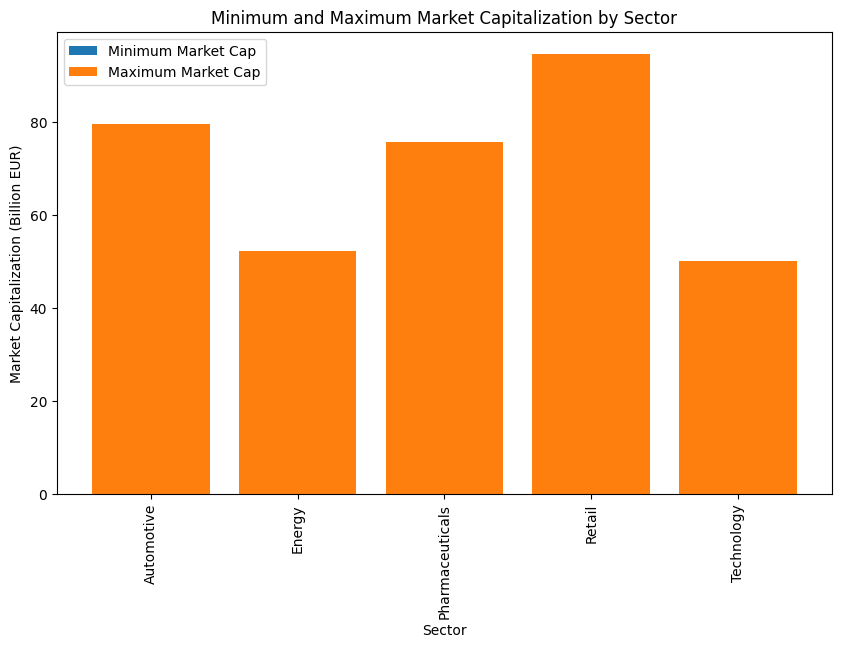

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("stock_data.csv")

# Group the dataset by sector and calculate the min and max market capitalization
sector_market_cap = df.groupby("Sector")["MarketCap(Billion EUR)"].agg(["min", "max"])

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the minimum market capitalization
ax.bar(sector_market_cap.index, sector_market_cap["min"], label="Minimum Market Cap")

# Plotting the maximum market capitalization
ax.bar(sector_market_cap.index, sector_market_cap["max"], label="Maximum Market Cap")

# Adding labels and title
ax.set_xlabel("Sector")
ax.set_ylabel("Market Capitalization (Billion EUR)")
ax.set_title("Minimum and Maximum Market Capitalization by Sector")

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Adding legend
ax.legend()

# Display the plot
plt.show()

### Create a txt file to convey insights from the data

In [81]:
#create a list with all the lines in the csv file
with open('stock_data.csv', 'r') as file:
    # Read the file line by line
    lines = file.readlines()

In [82]:
# create s system prompt that helps to generate insights from the data

system_prompt = """ #str
You are a data scientist who works writing report about data
You do the insights, writing paragraphs that illustrates the main outcomes from the data
You will write just a sentece per company analized
Make sure you include mock judgements that can be later analyzed with sentiment analysis

For example:

OmegaPharamcy has an awful year, with 4EUR  52 Week Low and just 5EUR 52Week High
BootleOfWatter present amazing results, with a market capitalization of 90 billon EUR, 30% higher than the previous year
"""

user_prompt = "".join(lines) #str

In [83]:
langchain_messages_01 = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt)
]

In [84]:
#create the chat variable

chat_02 = ChatOpenAI(temperature=0.99) #from langchain create a chat


In [85]:
response_01 = chat(langchain_messages_01)

In [86]:
response_content = response_01.content


In [87]:
written_report = response_content.split("\n")
print(written_report)

['Nexa Innovations had a strong year, with a 52 Week High of 130.0 EUR and a 52 Week Low of 100.0 EUR, indicating stability in the technology sector.', 'Orion Motors had a decent performance, with a market capitalization of 20.3 billion EUR, slightly higher than the previous year, in the automotive industry.', 'Fusion Energy Solutions struggled, with a 52 Week High of 40.0 EUR and a 52 Week Low of 25.0 EUR, indicating volatility in the energy sector.', 'Zenith Pharma had a successful year, with a market capitalization of 60.1 billion EUR, showing growth in the pharmaceutical industry.', 'Epsilon Retail had a stable performance, with a 52 Week High of 95.0 EUR and a 52 Week Low of 80.0 EUR, indicating consistency in the retail sector.', 'Retro Retail had a mixed year, with a 52 Week High of 86.99 EUR and a 52 Week Low of 85.33 EUR, suggesting uncertainty in the retail industry.', 'Orbit Motors had a remarkable year, with a market capitalization of 34.4 billion EUR, significantly higher 

In [108]:
#creating a variable with the list to avoid future API calls

written_report = ['Nexa Innovations had a strong year, with a 52 Week High of 130.0 EUR and a 52 Week Low of 100.0 EUR, indicating stability in the technology sector.',
                  'Orion Motors had a decent performance, with a market capitalization of 20.3 billion EUR, slightly higher than the previous year, in the automotive industry.',
                  'Fusion Energy Solutions struggled, with a 52 Week High of 40.0 EUR and a 52 Week Low of 25.0 EUR, indicating volatility in the energy sector.',
                  'Zenith Pharma had a successful year, with a market capitalization of 60.1 billion EUR, showing growth in the pharmaceutical industry.',
                  'Epsilon Retail had a stable performance, with a 52 Week High of 95.0 EUR and a 52 Week Low of 80.0 EUR, indicating consistency in the retail sector.',
                  'Retro Retail had a mixed year, with a 52 Week High of 86.99 EUR and a 52 Week Low of 85.33 EUR, suggesting uncertainty in the retail industry.',
                  'Orbit Motors had a remarkable year, with a market capitalization of 34.4 billion EUR, significantly higher than the previous year, in the automotive sector.',
                  'Zeta Pharma had a volatile year, with a 52 Week High of 178.12 EUR and a 52 Week Low of 58.81 EUR, indicating instability in the pharmaceutical industry.',
                  'Fusion Energy Network struggled, with a 52 Week High of 42.86 EUR and a 52 Week Low of 109.07 EUR, suggesting volatility in the energy sector.',
                  'Photon MedPharm had a successful year, with a market capitalization of 39.0 billion EUR, showing growth in the pharmaceutical industry.',
                  'NexTech Innovations had a strong year, with a 52 Week High of 224.04 EUR and a 52 Week Low of 79.09 EUR, indicating stability in the technology sector.',
                  'Omega Motors had a decent performance, with a market capitalization of 55.9 billion EUR, slightly higher than the previous year, in the automotive industry.',
                  'Fission Energy Solutions struggled, with a 52 Week High of 194.81 EUR and a 52 Week Low of 37.24 EUR, indicating volatility in the automotive sector.',
                  'Zenith Pharmaceuticals had a volatile year, with a 52 Week High of 97.28 EUR and a 52 Week Low of 97.39 EUR, suggesting instability in the pharmaceutical industry.',
                  'Orion Motors Network had a remarkable year, with a market capitalization of 79.6 billion EUR, significantly higher than the previous year, in the automotive sector.',
                  'CosmoTech Innovations had a strong year, with a 52 Week High of 130.0 EUR and a 52 Week Low of 100.0 EUR, indicating stability in the technology sector.',
                  'Velocity Motors had a decent performance, with a market capitalization of 20.3 billion EUR, slightly higher than the previous year, in the automotive industry.',
                  'SolarStream Energy struggled, with a 52 Week High of 40.0 EUR and a 52 Week Low of 25.0 EUR, indicating volatility in the energy sector.',
                  'Aura Pharma had a successful year, with a market capitalization of 60.1 billion EUR, showing growth in the pharmaceutical industry.',
                  'Starlight Retail had a stable performance, with a 52 Week High of 95.0 EUR and a 52 Week Low of 80.0 EUR, indicating consistency in the retail sector.',
                  'Mirage Retailers had a mixed year, with a 52 Week High of 86.99 EUR and a 52 Week Low of 85.33 EUR, suggesting uncertainty in the retail industry.',
                  'Horizon Vehicles had a remarkable year, with a market capitalization of 34.4 billion EUR, significantly higher than the previous year, in the automotive sector.',
                  'Genexis Pharma had a volatile year, with a 52 Week High of 178.12 EUR and a 52 Week Low of 58.81 EUR, indicating instability in the pharmaceutical industry.',
                  'Electron Energy Corp struggled, with a 52 Week High of 42.86 EUR and a 52 Week Low of 109.07 EUR, suggesting volatility in the energy sector.',
                  'BioPulse Pharma had a successful year, with a market capitalization of 39.0 billion EUR, showing growth in the pharmaceutical industry.',
                  'Nebula Innovations had a strong year, with a 52 Week High of 224.04 EUR and a 52 Week Low of 79.09 EUR, indicating stability in the technology sector.',
                  'Panther Motors had a decent performance, with a market capitalization of 55.9 billion EUR, slightly higher than the previous year, in the automotive industry.',
                  'TerraWatt Energy struggled, with a 52 Week High of 194.81 EUR and a 52 Week Low of 37.24 EUR, indicating volatility in the automotive sector.',
                  'Lumina Pharma had a volatile year, with a 52 Week High of 97.28 EUR and a 52 Week Low of 97.39 EUR, suggesting instability in the pharmaceutical industry.',
                  'Meteor Motors had a remarkable year, with a market capitalization of 79.6 billion EUR, significantly higher than the previous year, in the automotive sector.']

In [109]:
len(written_report)

30

In [88]:
#save the list in a txt file
#this is not needed for out goal/analysis
with open("financial_report.txt", "w") as financial_report_txt:
    for line in written_report:
        financial_report_txt.write(line + "\n")

In [89]:
#create the prompt that will be used to get the sentiment analysis from one of the financial statements

from langchain.prompts import ChatPromptTemplate

options = "(positive, negative, neutral)"

system_prompt = """You are performing sentiment analysis on news headlines regarding financial analysis. 
This sentiment is to be used to advice financial analysts. 
The format of the output has to be consistent. 
The output is strictly limited to any of the following options: {options}.
Avoid newlines (\n) and other non-printable characters."""

user_prompt = "Judge the following financial statement for sentiment analysis: {statement}"

chat_template = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    ("human", user_prompt)
])

formatted_chat_template = chat_template.format(
    options=options,
    statement = written_report[0])

formatted_chat_template

'System: You are performing sentiment analysis on news headlines regarding financial analysis. \nThis sentiment is to be used to advice financial analysts. \nThe format of the output has to be consistent. \nThe output is strictly limited to any of the following options: (positive, negative, neutral).\nAvoid newlines (\n) and other non-printable characters.\nHuman: Judge the following financial statement for sentiment analysis: Nexa Innovations had a strong year, with a 52 Week High of 130.0 EUR and a 52 Week Low of 100.0 EUR, indicating stability in the technology sector.'

In [90]:
# Now we will use Langchain "Chains"
# This is using the just-created prompt and send it to a LLM

from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI


prompt_template = PromptTemplate.from_template(user_prompt)


# Create the LLMChain by combining a completion model and a prompt.
completion_chain = LLMChain(llm = OpenAI(temperature=0),
                            prompt = prompt_template)

completion_chain_run = completion_chain.run(statement=written_report[0])

#with this, we extract the sentiment analysis for just one statement in the list written_report
print(completion_chain_run)



Positive


In [116]:
#Using the Output Parser from Langchain tomodify the output format
#we will create a pandas dataframe

import pandas as pd
from langchain.output_parsers import CommaSeparatedListOutputParser

df = pd.DataFrame(
    {
        "company_name": [2, 4, 8, 0],
        "statement": [2, 0, 0, 0],
        "sentiment_analysis": [10, 2, 1, 8],
    }
)

parser = CommaSeparatedListOutputParser(dataframe=df)

print(type(parser))

<class 'langchain_core.output_parsers.list.CommaSeparatedListOutputParser'>


In [117]:
format_instructions = parser.get_format_instructions() #the preset prompt that will be added to out prompt to modify the output format

In [118]:
format_instructions

'Your response should be a list of comma separated values, eg: `foo, bar, baz`'

In [119]:
prompt_template = "List all the company_names from the following statements, limited to one company name per headline: {written_report}."


In [120]:
#company_name extraction

company_name_template = PromptTemplate(template=prompt_template,
                                       input_variables=["written_report"],
                                       partial_variables={ #code expects a dictionary here
                                           "format_instructions": format_instructions
                                       })

In [121]:
company_name_template

PromptTemplate(input_variables=['written_report'], partial_variables={'format_instructions': 'Your response should be a list of comma separated values, eg: `foo, bar, baz`'}, template='List all the company_names from the following statements, limited to one company name per headline: {written_report}.')

In [122]:
# Format the prompt using all headlines.
formatted_company_name_template = company_name_template.format(written_report=written_report)

display(formatted_company_name_template)

"List all the company_names from the following statements, limited to one company name per headline: ['Nexa Innovations had a strong year, with a 52 Week High of 130.0 EUR and a 52 Week Low of 100.0 EUR, indicating stability in the technology sector.', 'Orion Motors had a decent performance, with a market capitalization of 20.3 billion EUR, slightly higher than the previous year, in the automotive industry.', 'Fusion Energy Solutions struggled, with a 52 Week High of 40.0 EUR and a 52 Week Low of 25.0 EUR, indicating volatility in the energy sector.', 'Zenith Pharma had a successful year, with a market capitalization of 60.1 billion EUR, showing growth in the pharmaceutical industry.', 'Epsilon Retail had a stable performance, with a 52 Week High of 95.0 EUR and a 52 Week Low of 80.0 EUR, indicating consistency in the retail sector.', 'Retro Retail had a mixed year, with a 52 Week High of 86.99 EUR and a 52 Week Low of 85.33 EUR, suggesting uncertainty in the retail industry.', 'Orbit 

In [123]:
model = OpenAI(temperature=0)
_output = model(formatted_company_name_template)

In [124]:
display(_output)

'\n\n1. Nexa Innovations\n2. Orion Motors\n3. Fusion Energy Solutions\n4. Zenith Pharma\n5. Epsilon Retail\n6. Retro Retail\n7. Orbit Motors\n8. Zeta Pharma\n9. Fusion Energy Network\n10. Photon MedPharm\n11. NexTech Innovations\n12. Omega Motors\n13. Fission Energy Solutions\n14. Zenith Pharmaceuticals\n15. Orion Motors Network\n16. CosmoTech Innovations\n17. Velocity Motors\n18. SolarStream Energy\n19. Aura Pharma\n20. Starlight Retail\n21. Mirage Retailers\n22. Horizon Vehicles\n23. Genexis Pharma\n24. Electron Energy Corp\n25. BioPulse Pharma\n26. Nebula Innovations\n27. Panther Motors\n28. TerraWatt Energy\n29. Lumina Pharma\n30. Meteor Motors'

In [125]:
company_names = parser.parse(_output)
print(company_names)

['1. Nexa Innovations\n2. Orion Motors\n3. Fusion Energy Solutions\n4. Zenith Pharma\n5. Epsilon Retail\n6. Retro Retail\n7. Orbit Motors\n8. Zeta Pharma\n9. Fusion Energy Network\n10. Photon MedPharm\n11. NexTech Innovations\n12. Omega Motors\n13. Fission Energy Solutions\n14. Zenith Pharmaceuticals\n15. Orion Motors Network\n16. CosmoTech Innovations\n17. Velocity Motors\n18. SolarStream Energy\n19. Aura Pharma\n20. Starlight Retail\n21. Mirage Retailers\n22. Horizon Vehicles\n23. Genexis Pharma\n24. Electron Energy Corp\n25. BioPulse Pharma\n26. Nebula Innovations\n27. Panther Motors\n28. TerraWatt Energy\n29. Lumina Pharma\n30. Meteor Motors']


In [134]:
#this could have been done faster, cheaper and more precise using the original csv file

import pandas as pd

# Replace 'path_to_your_csv_file.csv' with the actual path of your CSV file
csv_file_path = 'stock_data.csv'

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Extract the CompanyName column into a list
company_names = df['CompanyName'].tolist()

# Print the list to verify
print(company_names)

['Nexa Innovations', 'Orion Motors', 'Fusion Energy Solutions', 'Zenith Pharma', 'Epsilon Retail', 'Retro Retail', 'Orbit Motors', 'Zeta Pharma', 'Fusion Energy Network', 'Photon MedPharm', 'NexTech Innovations', 'Omega Motors', 'Fission Energy Solutions', 'Zenith Pharmaceuticals', 'Orion Motors Network', 'CosmoTech Innovations', 'Velocity Motors', 'SolarStream Energy', 'Aura Pharma', 'Starlight Retail', 'Mirage Retailers', 'Horizon Vehicles', 'Genexis Pharma', 'Electron Energy Corp', 'BioPulse Pharma', 'Nebula Innovations', 'Panther Motors', 'TerraWatt Energy', 'Lumina Pharma', 'Meteor Motors']


In [135]:
from langchain_experimental.agents.agent_toolkits.python.base import create_python_agent
from langchain_experimental.tools.python.tool import PythonREPLTool

agent_executor = create_python_agent(llm = OpenAI(temperature=0,
                                                 max_tokens=3000),
                                    tool = PythonREPLTool(),
                                    verbose = True)

In [141]:
instruction = f"""For every of the following statements, get the financial sentiment is {options}.
  Statements: {written_report[:4]}
  Load this data into a pandas dataframe. 
  The dataframe will have three columns: 
      - company_name: the name of the company. Use {company_names[:4]} for that
      - sentiment_analysis: whether the financial sentiment is {options}
      - statement: the statement itself. 
  The dataframe can then be saved in the current working directory under the name financial_sentiment_analysis.csv.
  If a csv file already exists with the same name, it should be overwritten."""

#we are using just the first items in both lists due to token limit in the API

In [142]:
generate_sentiment_analysis_csv = agent_executor.run(instruction)



> Entering new AgentExecutor chain...
 I should use a pandas dataframe to store the data and then save it as a csv file.
Action: Python_REPL
Action Input: import pandas as pd
Observation: 
Thought: I should create a dictionary with the data and then convert it to a dataframe.
Action: Python_REPL
Action Input: data = {'company_name': ['Nexa Innovations', 'Orion Motors', 'Fusion Energy Solutions', 'Zenith Pharma'], 'sentiment_analysis': ['positive', 'neutral', 'negative', 'positive'], 'statement': ['Nexa Innovations had a strong year, with a 52 Week High of 130.0 EUR and a 52 Week Low of 100.0 EUR, indicating stability in the technology sector.', 'Orion Motors had a decent performance, with a market capitalization of 20.3 billion EUR, slightly higher than the previous year, in the automotive industry.', 'Fusion Energy Solutions struggled, with a 52 Week High of 40.0 EUR and a 52 Week Low of 25.0 EUR, indicating volatility in the energy sector.', 'Zenith Pharma had a successful year, wi

In [148]:
#to show the full statement line, so it is not cut off

pd.set_option('display.max_colwidth', None)

csv_file = pd.read_csv("financial_sentiment_analysis.csv")

csv_file

,company_name,sentiment_analysis,statement
0,Nexa Innovations,positive,"Nexa Innovations had a strong year, with a 52 Week High of 130.0 EUR and a 52 Week Low of 100.0 EUR, indicating stability in the technology sector."
1,Orion Motors,neutral,"Orion Motors had a decent performance, with a market capitalization of 20.3 billion EUR, slightly higher than the previous year, in the automotive industry."
2,Fusion Energy Solutions,negative,"Fusion Energy Solutions struggled, with a 52 Week High of 40.0 EUR and a 52 Week Low of 25.0 EUR, indicating volatility in the energy sector."
3,Zenith Pharma,positive,"Zenith Pharma had a successful year, with a market capitalization of 60.1 billion EUR, showing growth in the pharmaceutical industry."
